In [2]:
# do necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import holidays, salary_dictionary, train-attendance, train-leaves, train-salary csv files in data folder from pd
holidays = pd.read_csv('../data/holidays.csv')
salary_dictionary = pd.read_csv('../data/salary_dictionary.csv')
train_attendance = pd.read_csv('../data/train-attendance.csv')
train_leaves = pd.read_csv('../data/train-leaves.csv')
train_salary = pd.read_csv('../data/train-salary.csv')

C:\Users\Malshan\AppData\Local\Temp\ipykernel_13508\386175936.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_attendance = pd.read_csv('../data/train-attendance.csv')


In [4]:
# get total different sites per Area from train-salary
area_df = train_salary.groupby('Area')['SiteNo'].nunique()

# convert area_df to dataframe
area_df = pd.DataFrame(area_df).reset_index()
area_df

,Area,SiteNo
0,Anuradhapura,6
1,Badulla,3
2,Colombo,2
3,Gampaha,3
4,Jaffna,2
5,Kandy,3
6,Kilinochchi,1
7,Mannar,1
8,Mathale,2
9,Mathara,1


In [5]:
total_employees = train_salary.groupby('Area')['Employee_No'].nunique()
total_employees = pd.DataFrame(total_employees).reset_index()
total_employees = total_employees.rename(columns={'Employee_No': 'Total_Employees'})
total_employees

,Area,Total_Employees
0,Anuradhapura,157
1,Badulla,329
2,Colombo,109
3,Gampaha,88
4,Jaffna,97
5,Kandy,264
6,Kilinochchi,50
7,Mannar,4
8,Mathale,408
9,Mathara,54


In [6]:
merged_df = pd.merge(area_df, total_employees, on='Area')
merged_df

,Area,SiteNo,Total_Employees
0,Anuradhapura,6,157
1,Badulla,3,329
2,Colombo,2,109
3,Gampaha,3,88
4,Jaffna,2,97
5,Kandy,3,264
6,Kilinochchi,1,50
7,Mannar,1,4
8,Mathale,2,408
9,Mathara,1,54


In [7]:
# delete records with Area = \N
merged_df = merged_df[merged_df['Area'] != '\\N']
merged_df

,Area,SiteNo,Total_Employees
0,Anuradhapura,6,157
1,Badulla,3,329
2,Colombo,2,109
3,Gampaha,3,88
4,Jaffna,2,97
5,Kandy,3,264
6,Kilinochchi,1,50
7,Mannar,1,4
8,Mathale,2,408
9,Mathara,1,54


In [8]:
# export merged_df to csv
merged_df.to_csv('area_det.csv', index=False)

In [9]:
# change the order of columns
area_loc = area_loc[['Area', 'Latitude', 'Longitude']]
area_loc

NameError: name 'area_loc' is not defined

In [ ]:
# add a new column as Country and assign value as Sri Lanka
area_loc['Country'] = 'Sri Lanka'

C:\Users\Malshan\AppData\Local\Temp\ipykernel_14520\2130715419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_loc['Country'] = 'Sri Lanka'


In [ ]:
# export area_loc to csv
area_loc.to_csv('area_loc.csv', index=False)

In [ ]:
train_salary

,Employee_No,year,month,SiteNo,Area,Accomadation Allowance,Accommodation Allowance,Add. Allow. No Pay Deduction,Additional Allowance_0,Additional Allowance_2,...,WSL No of Full Worked Days,WSL No of Half Days,WSL OT 1.5,WSL OT Hours 1.5,WSL OT Rate,WSL Total Earning,WSL Total Working Days,WSLOther Allowance Rate,Working Days - Full,Working Days - Half Day
0,347,2021,7,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,347,2021,8,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,347,2021,9,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,347,2021,10,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,347,2021,11,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,3043,2022,12,194.1,Anuradhapura,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9031,3044,2022,12,194.1,Anuradhapura,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9032,3045,2022,12,194.1,Anuradhapura,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9033,3084,2022,12,197.0,Badulla,0.0,0.0,41666.67,0.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_salary['Total Earnings'] = train_salary['Total Earnings_0'] + train_salary['Total Earnings_2']
train_salary

,Employee_No,year,month,SiteNo,Area,Accomadation Allowance,Accommodation Allowance,Add. Allow. No Pay Deduction,Additional Allowance_0,Additional Allowance_2,...,WSL No of Half Days,WSL OT 1.5,WSL OT Hours 1.5,WSL OT Rate,WSL Total Earning,WSL Total Working Days,WSLOther Allowance Rate,Working Days - Full,Working Days - Half Day,Total Earnings
0,347,2021,7,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37412.43
1,347,2021,8,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35356.81
2,347,2021,9,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38409.95
3,347,2021,10,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36325.83
4,347,2021,11,1.0,Colombo,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37038.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,3043,2022,12,194.1,Anuradhapura,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24310.00
9031,3044,2022,12,194.1,Anuradhapura,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26010.00
9032,3045,2022,12,194.1,Anuradhapura,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26100.00
9033,3084,2022,12,197.0,Badulla,0.0,0.0,41666.67,0.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80000.00


In [ ]:
# create a df with Total Earnings and Area
area_earnings = train_salary.groupby('Area')['Total Earnings'].sum()
area_earnings = pd.DataFrame(area_earnings).reset_index()
area_earnings

,Area,Total Earnings
0,Anuradhapura,46817784.75
1,Badulla,51688177.29
2,Colombo,37600141.68
3,Gampaha,36605954.33
4,Jaffna,35890019.20
5,Kandy,77969524.77
6,Kilinochchi,14658528.01
7,Mannar,166514.43
8,Mathale,74996112.71
9,Mathara,12250243.46


In [ ]:
# merge area_earnings and merged_df
area_earnings = pd.merge(area_earnings, merged_df, on='Area')
area_earnings

,Area,Total Earnings,SiteNo,Total_Employees
0,Anuradhapura,46817784.75,6,157
1,Badulla,51688177.29,3,329
2,Colombo,37600141.68,2,109
3,Gampaha,36605954.33,3,88
4,Jaffna,35890019.20,2,97
5,Kandy,77969524.77,3,264
6,Kilinochchi,14658528.01,1,50
7,Mannar,166514.43,1,4
8,Mathale,74996112.71,2,408
9,Mathara,12250243.46,1,54


In [ ]:
area_earnings.drop(['SiteNo'], axis=1, inplace=True)
area_earnings

,Area,Total Earnings,Total_Employees
0,Anuradhapura,46817784.75,157
1,Badulla,51688177.29,329
2,Colombo,37600141.68,109
3,Gampaha,36605954.33,88
4,Jaffna,35890019.20,97
5,Kandy,77969524.77,264
6,Kilinochchi,14658528.01,50
7,Mannar,166514.43,4
8,Mathale,74996112.71,408
9,Mathara,12250243.46,54


In [ ]:
area_earnings['Earnings per Employee'] = area_earnings['Total Earnings'] / area_earnings['Total_Employees']
area_earnings

,Area,Total Earnings,Total_Employees,Earnings per Employee
0,Anuradhapura,46817784.75,157,298202.450637
1,Badulla,51688177.29,329,157106.921854
2,Colombo,37600141.68,109,344955.428257
3,Gampaha,36605954.33,88,415976.753750
4,Jaffna,35890019.20,97,370000.197938
5,Kandy,77969524.77,264,295339.108977
6,Kilinochchi,14658528.01,50,293170.560200
7,Mannar,166514.43,4,41628.607500
8,Mathale,74996112.71,408,183814.001740
9,Mathara,12250243.46,54,226856.360370


In [ ]:
# sort area_earnings by Earnings per Employee
area_earnings = area_earnings.sort_values(by='Earnings per Employee', ascending=False)
area_earnings

,Area,Total Earnings,Total_Employees,Earnings per Employee
3,Gampaha,36605954.33,88,415976.753750
4,Jaffna,35890019.20,97,370000.197938
2,Colombo,37600141.68,109,344955.428257
0,Anuradhapura,46817784.75,157,298202.450637
5,Kandy,77969524.77,264,295339.108977
6,Kilinochchi,14658528.01,50,293170.560200
9,Mathara,12250243.46,54,226856.360370
11,Polonnaruwa,13162159.07,66,199426.652576
8,Mathale,74996112.71,408,183814.001740
10,Mulaithive,3929615.65,23,170852.854348


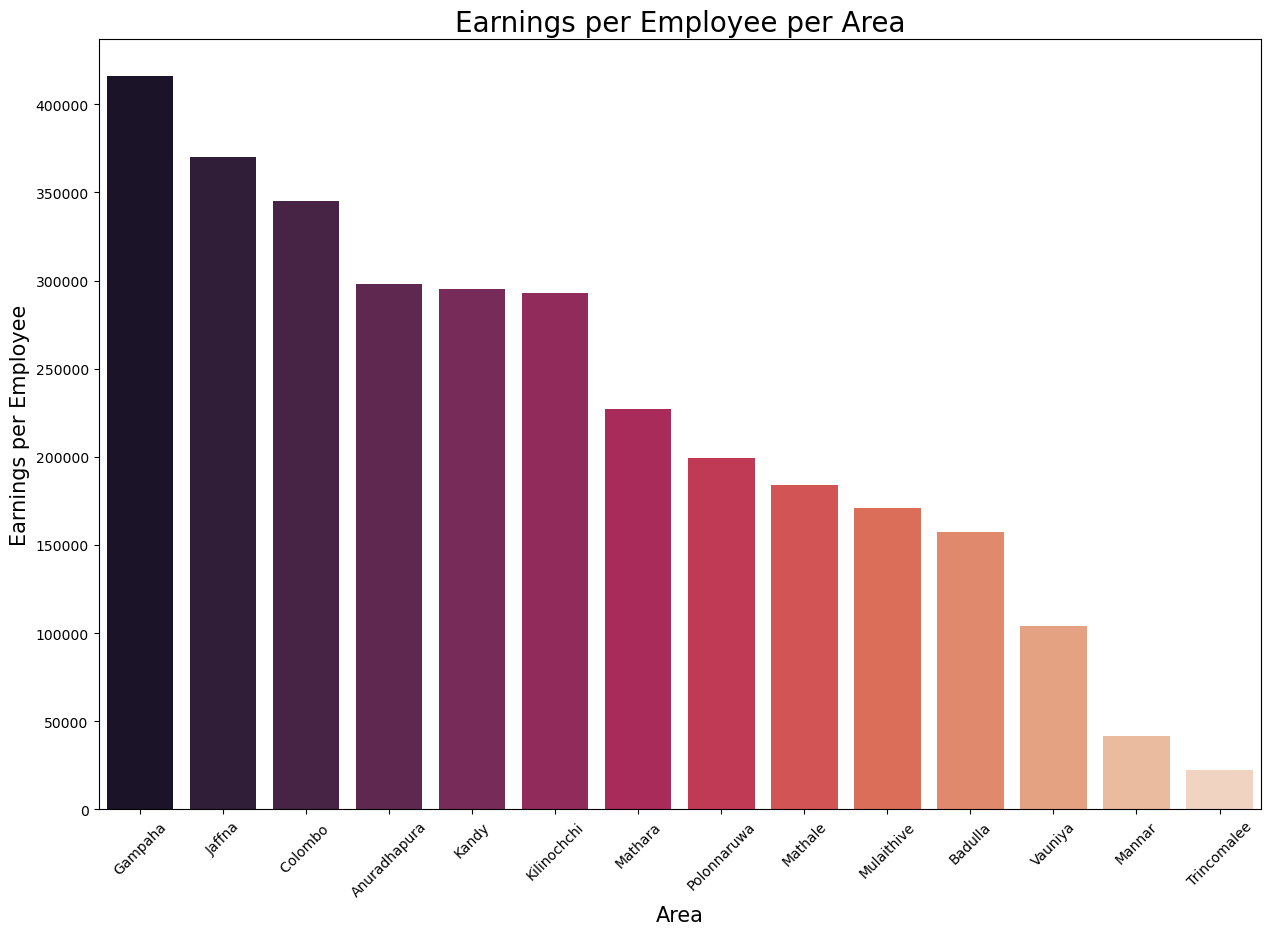

In [ ]:
# plot a barplot with Area and Earnings per Employee color palette = 'rocket'
plt.figure(figsize=(15, 10))
sns.barplot(x='Area', y='Earnings per Employee', data=area_earnings, palette='rocket')
plt.xticks(rotation=45)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Earnings per Employee', fontsize=15)
plt.title('Earnings per Employee per Area', fontsize=20)
plt.savefig('Earnings per Employee per Area.png')
plt.show()


In [10]:
resigned_employees = pd.read_csv('resigned_employees.csv')

In [23]:
# merge train_salary and resigned_employees
resigned = pd.merge(resigned_employees, train_salary, on='Employee_No', how='left')
resigned

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,WSL No of Full Worked Days,WSL No of Half Days,WSL OT 1.5,WSL OT Hours 1.5,WSL OT Rate,WSL Total Earning,WSL Total Working Days,WSLOther Allowance Rate,Working Days - Full,Working Days - Half Day
0,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3130,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3131,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3132,2836,5434,Janis Borer Jr,Miss,Female,1,Single,17,2022-11-01,12/22/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# get number of employees per Area
resigned_area = resigned.groupby('Area')['Employee_No'].nunique().reset_index()
resigned_area

,Area,Employee_No
0,Anuradhapura,41
1,Badulla,65
2,Colombo,41
3,Gampaha,20
4,Jaffna,32
5,Kandy,141
6,Kilinochchi,11
7,Mannar,2
8,Mathale,103
9,Mathara,21


In [25]:
resigned_area = resigned_area.rename(columns={'Employee_No': 'Resigned_Employees'})
resigned_area = resigned_area[resigned_area['Area'] != '\\N']
resigned_area

,Area,Resigned_Employees
0,Anuradhapura,41
1,Badulla,65
2,Colombo,41
3,Gampaha,20
4,Jaffna,32
5,Kandy,141
6,Kilinochchi,11
7,Mannar,2
8,Mathale,103
9,Mathara,21


In [26]:
# merge merged_df and resigned_area
resigned_area = pd.merge(merged_df, resigned_area, on='Area')
resigned_area['resignation_rate'] = resigned_area['Resigned_Employees'] / resigned_area['Total_Employees']*100
resigned_area

,Area,SiteNo,Total_Employees,Resigned_Employees,resignation_rate
0,Anuradhapura,6,157,41,26.114650
1,Badulla,3,329,65,19.756839
2,Colombo,2,109,41,37.614679
3,Gampaha,3,88,20,22.727273
4,Jaffna,2,97,32,32.989691
5,Kandy,3,264,141,53.409091
6,Kilinochchi,1,50,11,22.000000
7,Mannar,1,4,2,50.000000
8,Mathale,2,408,103,25.245098
9,Mathara,1,54,21,38.888889


In [38]:
# export resigned_area to csv
resigned_area.to_csv('resigned_area.csv', index=False)

In [29]:
resigned 

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,WSL No of Full Worked Days,WSL No of Half Days,WSL OT 1.5,WSL OT Hours 1.5,WSL OT Rate,WSL Total Earning,WSL Total Working Days,WSLOther Allowance Rate,Working Days - Full,Working Days - Half Day
0,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1988-01-27,6/28/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,1999-10-01,1/31/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3130,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3131,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,2022-07-14,11/4/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3132,2836,5434,Janis Borer Jr,Miss,Female,1,Single,17,2022-11-01,12/22/2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
resigned_site = resigned.groupby('SiteNo')['Employee_No'].nunique()
resigned_site = pd.DataFrame(resigned_site).reset_index()
resigned_site = resigned_site.rename(columns={'Employee_No': 'Resigned_Employees'})
resigned_site

,SiteNo,Resigned_Employees
0,1.0,41
1,169.0,21
2,179.1,34
3,179.2,104
4,182.0,4
5,183.0,5
6,184.0,4
7,187.0,11
8,188.0,19
9,189.0,15


In [35]:
all_sites = train_salary.groupby('SiteNo')['Employee_No'].nunique()
all_sites = pd.DataFrame(all_sites).reset_index()
all_sites = all_sites.rename(columns={'Employee_No': 'Total_Employees'})
all_sites

,SiteNo,Total_Employees
0,1.0,109
1,100.0,2
2,169.0,54
3,172.0,2
4,179.1,87
5,179.2,171
6,181.0,1
7,182.0,21
8,183.0,13
9,184.0,12


In [36]:
# merge all_sites and resigned_site
resigned_site = pd.merge(all_sites, resigned_site, on='SiteNo')
resigned_site['resignation_rate'] = resigned_site['Resigned_Employees'] / resigned_site['Total_Employees']*100


,SiteNo,Total_Employees,Resigned_Employees,resignation_rate
0,1.0,109,41,37.614679
1,169.0,54,21,38.888889
2,179.1,87,34,39.080460
3,179.2,171,104,60.818713
4,182.0,21,4,19.047619
5,183.0,13,5,38.461538
6,184.0,12,4,33.333333
7,187.0,23,11,47.826087
8,188.0,31,19,61.290323
9,189.0,54,15,27.777778


In [37]:
# sort resigned_site by resignation_rate
resigned_site = resigned_site.sort_values(by='resignation_rate', ascending=False)
resigned_site

,SiteNo,Total_Employees,Resigned_Employees,resignation_rate
8,188.0,31,19,61.290323
3,179.2,171,104,60.818713
11,191.0,4,2,50.000000
7,187.0,23,11,47.826087
2,179.1,87,34,39.080460
1,169.0,54,21,38.888889
5,183.0,13,5,38.461538
0,1.0,109,41,37.614679
21,199.1,76,28,36.842105
23,201.0,28,10,35.714286


In [27]:
# create a df with Area and Longitude, Latitude
area_loc = pd.DataFrame({
    'Area': ['Anuradhapura', 'Badulla', 'Colombo', 'Gamapaha', 'Jaffna', 'Kandy', 'Kilinochchi', 'Mannar', 'Mathale', 'Mathara','Mulaithive','Polonnaruwa','Trincomalee','Vauniya'],
    'Longitude': [80.4025, 81.0553, 79.8612, 79.9847, 80.0098, 80.6350, 80.4017, 79.9290, 80.6232, 80.5544, 80.8167, 81.0000, 81.2333, 80.5000],
    'Latitude': [8.3148, 6.9894, 6.9271, 7.0873, 9.6619, 7.2906, 9.4000, 8.9778, 7.4694, 5.9481, 9.2500, 7.9333, 8.5667, 8.7500]
})

area_loc

,Area,Longitude,Latitude
0,Anuradhapura,80.4025,8.3148
1,Badulla,81.0553,6.9894
2,Colombo,79.8612,6.9271
3,Gamapaha,79.9847,7.0873
4,Jaffna,80.0098,9.6619
5,Kandy,80.6350,7.2906
6,Kilinochchi,80.4017,9.4000
7,Mannar,79.9290,8.9778
8,Mathale,80.6232,7.4694
9,Mathara,80.5544,5.9481
